Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.



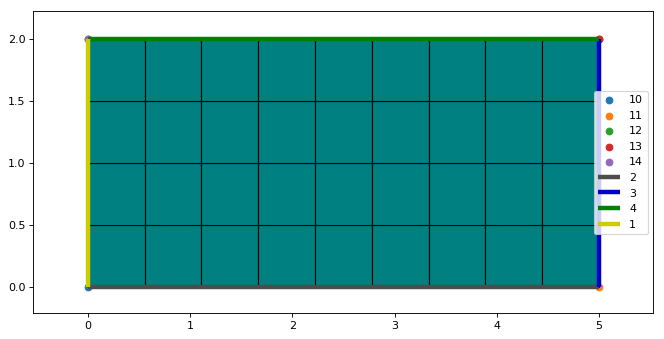

In [1]:
import sys 
#sys.path.append(r'H:\TUM-PC\Dokumente\Projects\AMfe')

import amfe
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import scipy
import copy
import pandas as pd

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/retangule_5_by_2_quad_par_2_irreg.msh')
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/retangule_5_by_2_ref_quad_par_2.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/retangule_5_by_2_ref_tri_par_2.msh')
msh_dict[3] = amfe.amfe_dir('meshes/test_meshes/retangule_5_by_2_tri_par_2.msh')
msh_dict[4] = amfe.amfe_dir('meshes/test_meshes/retangule_square_hole_5_by_2_quad_par_2.msh')
msh_dict[5] = amfe.amfe_dir('meshes/test_meshes/retangule_square_hole_5_by_2_tri_par_2.msh')
msh_dict[6] = amfe.amfe_dir('retangule_square_hole_5_by_2_tri_par_8.msh')

domain_id = {}
domain_id[0] = 6
domain_id[1] = 6
domain_id[2] = 6
domain_id[3] = 6
domain_id[4] = 6
domain_id[5] = 6
domain_id[6] = 6

bc = {}
bc[0] = [3,1,2]
bc[1] = [3,1,10]
bc[2] = [3,1,10]
bc[3] = [3,1,10]
bc[4] = [3,1,10]
bc[5] = [3,1,10]
bc[6] = [3,1,10]

# select mesh to be plotted
id = 0
mshfile = msh_dict[id]

# instanciating mesh class
m1 = amfe.Mesh()
m1.import_msh(mshfile)


fig, ax1=plt.subplots(1,figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_mesh(m1,ax1)
plt.show()

In [2]:
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)
domain = m1.set_domain('phys_group',6)


In [3]:
domain.split_in_partitions()

Extract interface node from sub_2 and sub_1
Interface nodes from sub_1 and sub_2 already extracted


{2: <amfe.mesh.SubMesh at 0x2372c69c7f0>,
 1: <amfe.mesh.SubMesh at 0x237303a1358>}

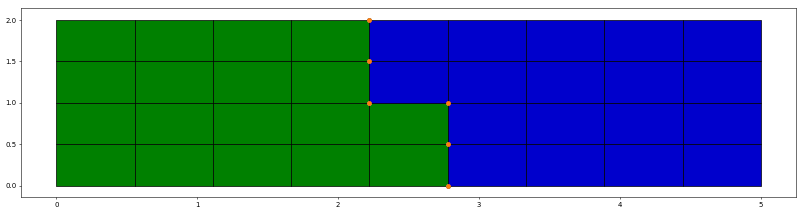

In [4]:
fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_domain(domain,ax1)
plt.show()

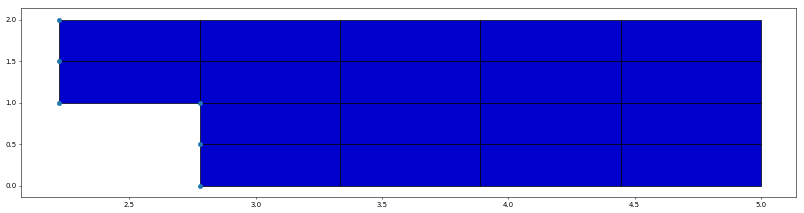

In [5]:
fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_submesh(domain.groups[1],ax1)
plt.show()

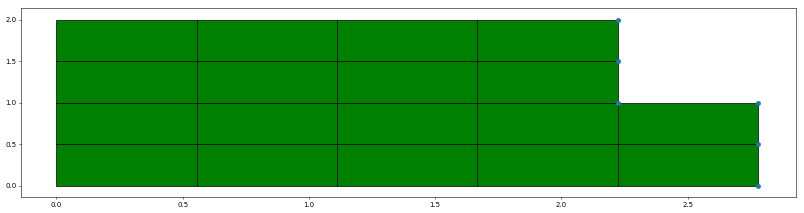

In [6]:
fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
amfe.plot_submesh(domain.groups[2],ax1)
plt.show()

In [7]:
splitting_tag ='partition_id'
value = 1e8
solver_type ='svd'
solver_type ='cholsps'
solver_type ='splusps'

my_comp = amfe.MechanicalSystem()
m2 = copy.deepcopy(m1)
my_comp.set_mesh_obj(m2)
my_comp.set_domain(6,my_material)
my_comp.apply_dirichlet_boundaries(1, 'xy')

my_comp.apply_neumann_boundaries(3, value, 'normal')
domain = my_comp.domain
domain.split_in_partitions(splitting_tag)
super_domain = amfe.SuperDomain(domain.groups,method=solver_type)
global_lambda= super_domain.solve_dual_interface()

d = super_domain.assemble_global_d()
Fim = super_domain.action_of_global_F(global_lambda)
dgap = d - Fim

global_alpha = super_domain.solve_alpha_given_error_gap(dgap)

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 36 elements and 100 dofs.
Time taken for preallocation: 0.00 seconds.
Extract interface node from sub_2 and sub_1
Interface nodes from sub_1 and sub_2 already extracted
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 18 elements and 56 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 18 elements and 56 dofs.
Time taken for preallocation: 0.00 seconds.


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\sparse\compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\sparse\compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [8]:
u_dict = super_domain.eval_subdomain_displacement(global_lambda, 0.0*global_alpha)

def plot_static(scale=1):
    fig, ax1=plt.subplots(1,figsize=(20, 5), dpi= 50, facecolor='w', edgecolor='k')
    amfe.plot_superdomain(super_domain, scale=scale, ax1 = ax1 )
    plt.show()
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(plot_static,scale=(0,200,5))  

interactive(children=(IntSlider(value=1, description='scale', max=200, step=5), Output()), _dom_classes=('widg…

<function __main__.plot_static(scale=1)>

In [9]:
u_dict

{1: array([-1.92699117e-02, -8.01586214e-04, -1.66177317e-02,  6.35496481e-05,
        -1.73965645e-02, -6.53409005e-04, -2.00429546e-02, -1.52711470e-03,
        -1.81783349e-02, -1.36863211e-03, -2.08210342e-02, -2.24349423e-03,
        -1.50638458e-02,  1.49573140e-03, -1.24169731e-02,  2.35754452e-03,
        -1.31940016e-02,  1.64306051e-03, -1.58393200e-02,  7.80508301e-04,
        -1.39719312e-02,  9.28685510e-04, -1.47512462e-02,  2.14310514e-04,
        -1.55314622e-02, -5.00173503e-04, -9.77050574e-03,  3.22214435e-03,
        -1.05486916e-02,  2.50786035e-03, -1.13269950e-02,  1.79382137e-03,
        -1.21059362e-02,  1.07978239e-03, -1.28849948e-02,  3.65498398e-04,
        -7.12469358e-03,  4.08736821e-03, -7.90326015e-03,  3.37311007e-03,
        -8.68179579e-03,  2.65895723e-03, -9.46050471e-03,  1.94480440e-03,
        -1.02391827e-02,  1.23054626e-03, -4.47914732e-03,  4.95257098e-03,
        -5.25777848e-03,  4.23830534e-03, -6.03637948e-03,  3.52409310e-03,
        -

In [10]:
global_lambda

array([ 2.50588946e+07, -7.31984084e+04,  4.99965460e+07,  1.28098732e+05,
        4.99930489e+07, -2.13712038e+04,  2.50001948e+07, -7.90223371e+04,
        2.50067563e+07, -8.41351565e+03,  2.49445595e+07,  5.39067330e+04])

In [11]:
global_alpha

array([-0.00639598,  0.03125   , -0.00959524])

In [12]:
G = super_domain.G
e = super_domain.e
F, d = super_domain.assemble_F_and_d()

In [13]:
F.dot(global_lambda) + G.T.dot(global_alpha) - d

array([-0.01371267, -0.00704265, -0.01678157, -0.00704265, -0.01064378,
       -0.00363276, -0.01371267, -0.00363276, -0.00757488, -0.00363276,
       -0.01985047, -0.00704265])

In [14]:
G.dot(global_lambda)- e

array([7.12811628e-09, 0.00000000e+00, 1.29218253e-09])

In [15]:
sub1 = super_domain.get_feti_subdomains(1)

In [16]:
R1 = sub1.null_space

In [17]:
sub2 = super_domain.get_feti_subdomains(2)
R2 = sub2.null_space

In [18]:
B1 = sub1.B_dict[1,2]

In [19]:
G1  = -B1.dot(R1)

In [20]:
print(G1)

[[-5.19389983e-12 -1.00000000e+00  5.19471744e-12]
 [-5.00000000e+00  1.37284510e-15  4.00000000e+00]
 [-9.00000000e-01 -1.00000000e+00  9.00000000e-01]
 [-5.00000000e+00  1.24220157e-15  4.00000000e+00]
 [ 9.00000000e-01 -1.00000000e+00 -9.00000000e-01]
 [-4.00000000e+00  1.21707716e-15  3.00000000e+00]
 [-4.66387682e-12 -1.00000000e+00  4.66465905e-12]
 [-4.00000000e+00  1.06100854e-15  3.00000000e+00]
 [ 1.80000000e+00 -1.00000000e+00 -1.80000000e+00]
 [-4.00000000e+00  1.08781370e-15  3.00000000e+00]
 [-1.80000000e+00 -1.00000000e+00  1.80000000e+00]
 [-5.00000000e+00  9.75626982e-16  4.00000000e+00]]


In [21]:
G.T

array([[-5.19389983e-12, -1.00000000e+00,  5.19471744e-12],
       [-5.00000000e+00,  1.37284510e-15,  4.00000000e+00],
       [-9.00000000e-01, -1.00000000e+00,  9.00000000e-01],
       [-5.00000000e+00,  1.24220157e-15,  4.00000000e+00],
       [ 9.00000000e-01, -1.00000000e+00, -9.00000000e-01],
       [-4.00000000e+00,  1.21707716e-15,  3.00000000e+00],
       [-4.66387682e-12, -1.00000000e+00,  4.66465905e-12],
       [-4.00000000e+00,  1.06100854e-15,  3.00000000e+00],
       [ 1.80000000e+00, -1.00000000e+00, -1.80000000e+00],
       [-4.00000000e+00,  1.08781370e-15,  3.00000000e+00],
       [-1.80000000e+00, -1.00000000e+00,  1.80000000e+00],
       [-5.00000000e+00,  9.75626982e-16,  4.00000000e+00]])

In [22]:
print(R1)

[[ 5.19389983e-12  1.00000000e+00 -5.19471744e-12]
 [ 5.00000000e+00 -1.37284510e-15 -4.00000000e+00]
 [ 4.66387682e-12  1.00000000e+00 -4.66465905e-12]
 [ 4.00000000e+00 -1.06100854e-15 -3.00000000e+00]
 [ 9.00000000e-01  1.00000000e+00 -9.00000000e-01]
 [ 4.00000000e+00 -1.03477714e-15 -3.00000000e+00]
 [ 9.00000000e-01  1.00000000e+00 -9.00000000e-01]
 [ 5.00000000e+00 -1.24220157e-15 -4.00000000e+00]
 [ 1.80000000e+00  1.00000000e+00 -1.80000000e+00]
 [ 4.00000000e+00 -1.04509193e-15 -3.00000000e+00]
 [ 1.80000000e+00  1.00000000e+00 -1.80000000e+00]
 [ 5.00000000e+00 -9.75626982e-16 -4.00000000e+00]
 [-1.80000000e+00  1.00000000e+00  1.80000000e+00]
 [ 4.00000000e+00 -1.08781370e-15 -3.00000000e+00]
 [-1.80000000e+00  1.00000000e+00  1.80000000e+00]
 [ 3.00000000e+00 -5.87307256e-16 -2.00000000e+00]
 [-9.00000000e-01  1.00000000e+00  9.00000000e-01]
 [ 3.00000000e+00 -5.27071099e-16 -2.00000000e+00]
 [-9.00000000e-01  1.00000000e+00  9.00000000e-01]
 [ 4.00000000e+00 -1.21707716e-

In [23]:
B1 = sub1.B_dict[1,2]
B2 = sub2.B_dict[2,1]
u1 = sub1.displacement
u2 = sub2.displacement
ub1 = B1.dot(u1)
ub2 = B2.dot(u2)

In [24]:
ub1

array([-1.92699117e-02, -8.01586214e-04, -2.00429546e-02, -1.52711470e-03,
       -1.58393200e-02,  7.80508301e-04, -1.66177317e-02,  6.35496481e-05,
       -1.50638458e-02,  1.49573140e-03, -2.08210342e-02, -2.24349423e-03])

In [25]:
ub2

array([-1.04252463e-02,  1.12310083e-15, -1.04308256e-02,  7.25528490e-04,
       -1.30772158e-02, -7.16958653e-04, -1.30774263e-02,  8.94468781e-16,
       -1.30740676e-02, -1.43218175e-03, -1.04313683e-02,  1.44190801e-03])

In [26]:
error = ub2 + ub1

In [27]:
error

array([-2.96951580e-02, -8.01586214e-04, -3.04737803e-02, -8.01586214e-04,
       -2.89165357e-02,  6.35496481e-05, -2.96951580e-02,  6.35496481e-05,
       -2.81379134e-02,  6.35496481e-05, -3.12524025e-02, -8.01586214e-04])

In [28]:
dgap

array([-0.02734375, -0.00976562, -0.03515625, -0.00683594, -0.02734375,
       -0.00195312, -0.02929688, -0.00439453, -0.02929688, -0.00195312,
       -0.0390625 , -0.00390625])

In [29]:
alpha = np.linalg.solve(G.dot(G.T), G.dot(error))

In [30]:
alpha

array([-0.00265896,  0.02969516, -0.00352409])

In [31]:
global_alpha

array([-0.00639598,  0.03125   , -0.00959524])

In [32]:
F.dot(global_lambda) + G.T.dot(global_alpha) - d

array([-0.01371267, -0.00704265, -0.01678157, -0.00704265, -0.01064378,
       -0.00363276, -0.01371267, -0.00363276, -0.00757488, -0.00363276,
       -0.01985047, -0.00704265])

In [33]:
F.dot(global_lambda) + G.T.dot(alpha) - d

array([-0.01215783, -0.00144317, -0.01312602, -0.00144317, -0.01118965,
       -0.00036741, -0.01215783, -0.00036741, -0.01022146, -0.00036741,
       -0.0140942 , -0.00144317])